In [11]:
# ============================================================
# 1. LIBRERÍAS
# ============================================================
#install.packages("readxl")
library(readxl)
#install.packages("dplyr")
library(dplyr)
#install.packages("tidyr")
library(tidyr)
#install.packages("ggplot2")
library(ggplot2)
#install.packages("caret")
library(caret)
#install.packages("pROC")
library(pROC)
#install.packages("e1071")
library(e1071)
#install.packages("randomForest")
library(randomForest)
#install.packages("rpart")
library(rpart)
#install.packages("rpart.plot")
library(rpart.plot)
#install.packages("kernlab")
library(kernlab)
#install.packages("nnet")
library(nnet)
#install.packages("gridExtra")
library(gridExtra)
#install.packages("corrplot")
library(corrplot)
#nstall.packages("DataExplorer")
library(DataExplorer)
#install.packages("skimr")
library(skimr)
#install.packages("car")
library(car)
#install.packages("tidyverse")
library(tidyverse)
#install.packages("kknn")
library(kknn)
#install.packages("ggpubr")
library(ggpubr)
#install.packages("reshape2")
library(reshape2)
#install.packages("glmnet")
library(glmnet)
#install.packages("klaR")
library(klaR)

Carga de datos

In [12]:
data_nacional <- read_xlsx("Afiliados activos con DM 202503.xlsx")
dim(data_nacional)
str(data_nacional)


[1] 765275     24

tibble [765,275 × 24] (S3: tbl_df/tbl/data.frame)
 $ FECHA_CORTE         : num [1:765275] 20251017 20251017 20251017 20251017 20251017 ...
 $ FECHA_AFILIADOS_SIS : num [1:765275] 20250331 20250331 20250331 20250331 20250331 ...
 $ CODIGO_ANONIMIZADO  : chr [1:765275] "6CC49622F77C819B5F5D03CC4FFDE75D32EF64B852F269E03BAC64E423BDC049" "F456ED86208E3730D5BB0273EADE0692259C824B7E3E0C1FDB1629666CDD94B3" "2C2924A2046E00225DF552148BE43A2296F061C214D92746F950DE698B435B8F" "DBC464128E0091B87B34BFD7EB22840B3FC3AAC498EC77C18C10DEB6CFD41CF6" ...
 $ EDAD                : num [1:765275] 76 57 80 20 74 74 83 59 18 43 ...
 $ UBIGEO              : num [1:765275] 140101 130105 160113 150201 150101 ...
 $ DEPARTAMENTO        : chr [1:765275] "LAMBAYEQUE" "LA LIBERTAD" "LORETO" "LIMA" ...
 $ PROVINCIA           : chr [1:765275] "CHICLAYO" "TRUJILLO" "MAYNAS" "BARRANCA" ...
 $ DISTRITO            : chr [1:765275] "CHICLAYO" "LA ESPERANZA" "SAN JUAN BAUTISTA" "BARRANCA" ...
 $ SEXO                : chr [1:7

In [13]:
data_puno <- data_nacional %>%
  filter(DEPARTAMENTO == "PUNO")
dim(data_puno)


[1] 10271    24

In [14]:
data <- data_puno %>%
  dplyr::select(
    EDAD,
    SEXO,
    CON_DX_OBESIDAD,
    CON_DX_HIPERTENSION,
    CON_DX_SALUDMENTAL,
    CANT_ATENCIONES,
    CANT_ATENCIONES_HOSP,
    DIAS_HOSP,
    TIPO_DIABETES
  )

[1] 6604

EDAD                 SEXO      CON_DX_OBESIDAD 
                   0                    0                    0 
 CON_DX_HIPERTENSION   CON_DX_SALUDMENTAL      CANT_ATENCIONES 
                   0                    0                    0 
CANT_ATENCIONES_HOSP            DIAS_HOSP        TIPO_DIABETES 
                   0                    0                    0

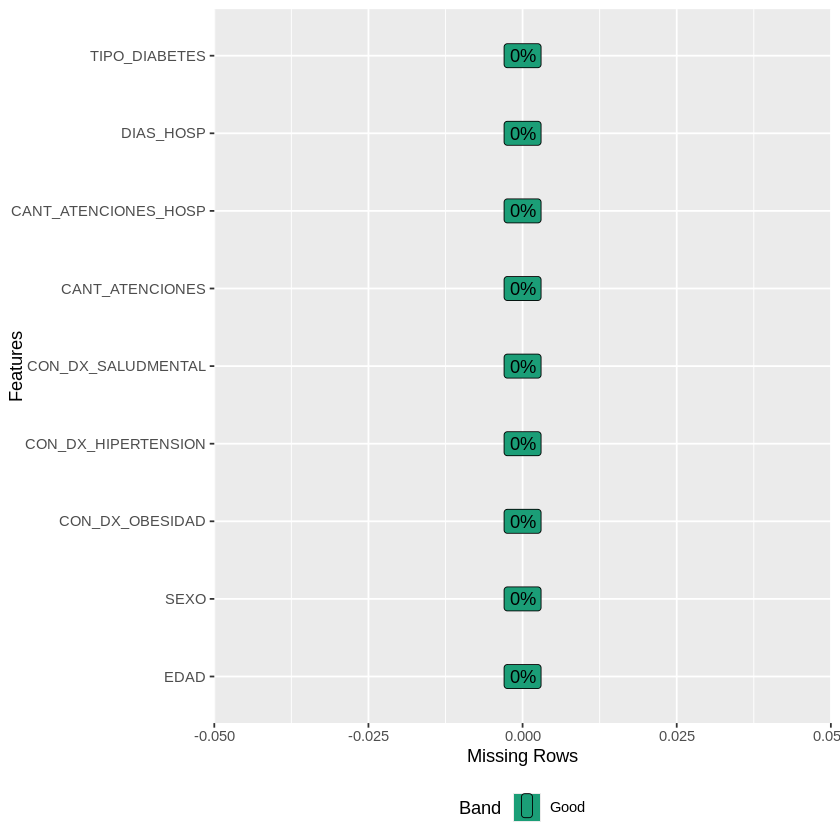

In [15]:
nrow(data) - nrow(distinct(data))
data <- data %>% distinct()
colSums(is.na(data))
plot_missing(data)


In [16]:
moda <- function(x) {
  ux <- na.omit(x)
  ux[which.max(tabulate(match(ux, ux)))]
}

data <- data %>%
  mutate(
    EDAD = ifelse(is.na(EDAD), median(EDAD, na.rm = TRUE), EDAD),
    CANT_ATENCIONES = ifelse(is.na(CANT_ATENCIONES),
                             median(CANT_ATENCIONES, na.rm = TRUE),
                             CANT_ATENCIONES),
    CANT_ATENCIONES_HOSP = ifelse(is.na(CANT_ATENCIONES_HOSP),
                                  median(CANT_ATENCIONES_HOSP, na.rm = TRUE),
                                  CANT_ATENCIONES_HOSP),
    DIAS_HOSP = ifelse(is.na(DIAS_HOSP),
                       median(DIAS_HOSP, na.rm = TRUE),
                       DIAS_HOSP),
    SEXO = ifelse(is.na(SEXO), moda(SEXO), SEXO),
    CON_DX_OBESIDAD = ifelse(is.na(CON_DX_OBESIDAD),
                             moda(CON_DX_OBESIDAD),
                             CON_DX_OBESIDAD),
    CON_DX_HIPERTENSION = ifelse(is.na(CON_DX_HIPERTENSION),
                                 moda(CON_DX_HIPERTENSION),
                                 CON_DX_HIPERTENSION),
    CON_DX_SALUDMENTAL = ifelse(is.na(CON_DX_SALUDMENTAL),
                                moda(CON_DX_SALUDMENTAL),
                                CON_DX_SALUDMENTAL)
  )
colSums(is.na(data))


EDAD                 SEXO      CON_DX_OBESIDAD 
                   0                    0                    0 
 CON_DX_HIPERTENSION   CON_DX_SALUDMENTAL      CANT_ATENCIONES 
                   0                    0                    0 
CANT_ATENCIONES_HOSP            DIAS_HOSP        TIPO_DIABETES 
                   0                    0                    0

In [17]:
data <- data %>%
  mutate(
    SEXO = as.factor(SEXO),
    CON_DX_OBESIDAD = as.factor(CON_DX_OBESIDAD),
    CON_DX_HIPERTENSION = as.factor(CON_DX_HIPERTENSION),
    CON_DX_SALUDMENTAL = as.factor(CON_DX_SALUDMENTAL),
    TIPO_DIABETES = as.factor(TIPO_DIABETES)
  )


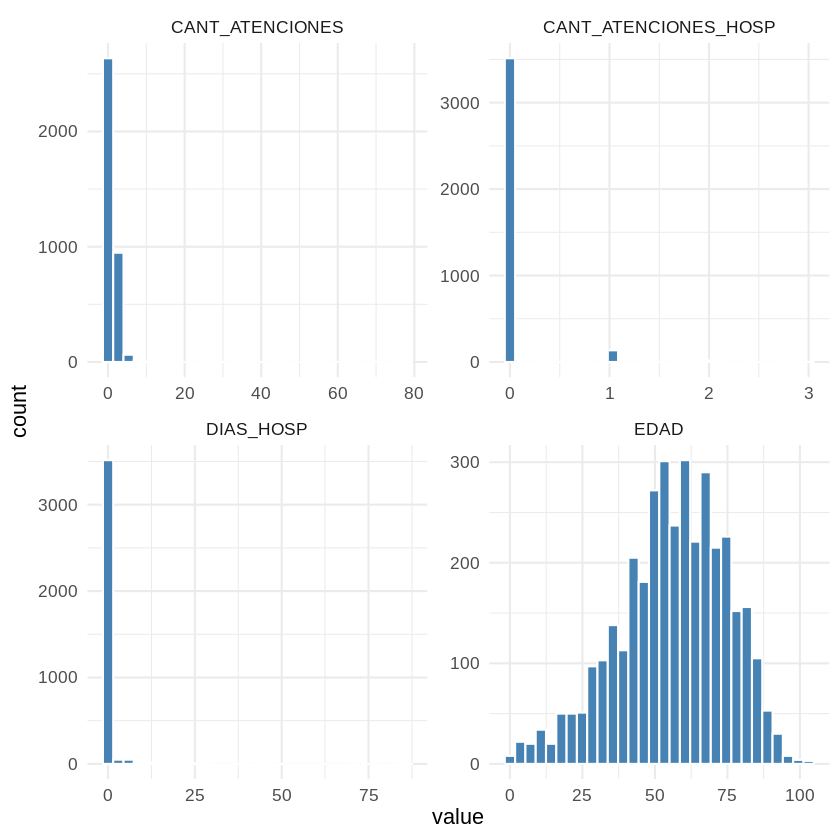

In [19]:
data %>%
  dplyr::select(where(is.numeric)) %>% # Explicitly call dplyr::select
  pivot_longer(everything()) %>%
  filter(!is.na(value)) %>%
  ggplot(aes(x = value)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  facet_wrap(~name, scales = "free") +
  theme_minimal(base_size = 13)

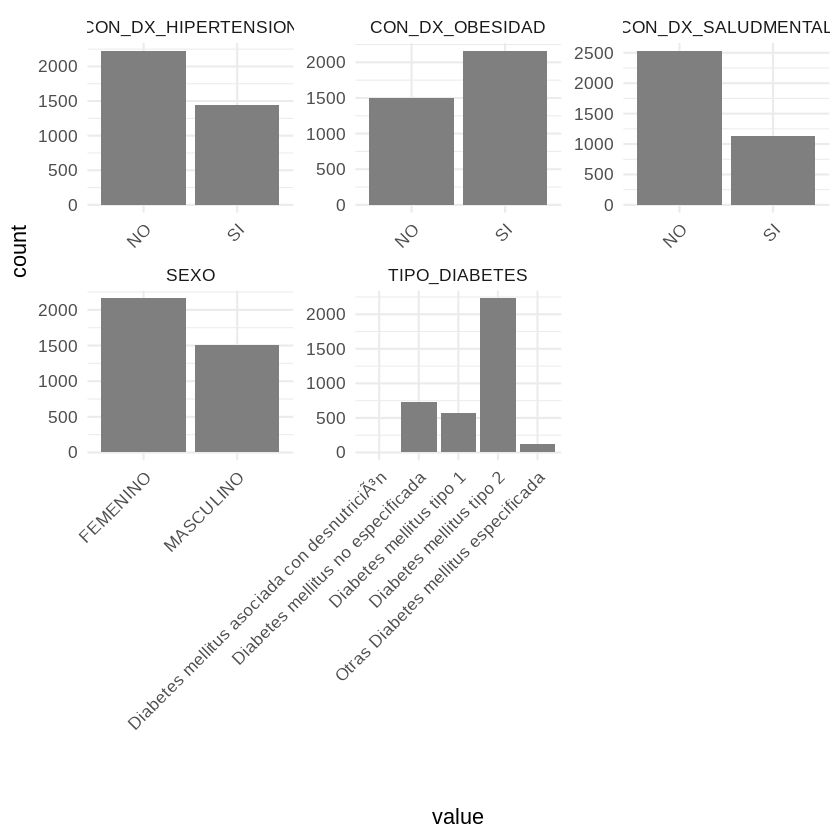

In [20]:
data %>%
  dplyr::select(where(is.factor)) %>%
  pivot_longer(everything()) %>%
  ggplot(aes(x = value)) +
  geom_bar(fill = "gray50") +
  facet_wrap(~name, scales = "free") +
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


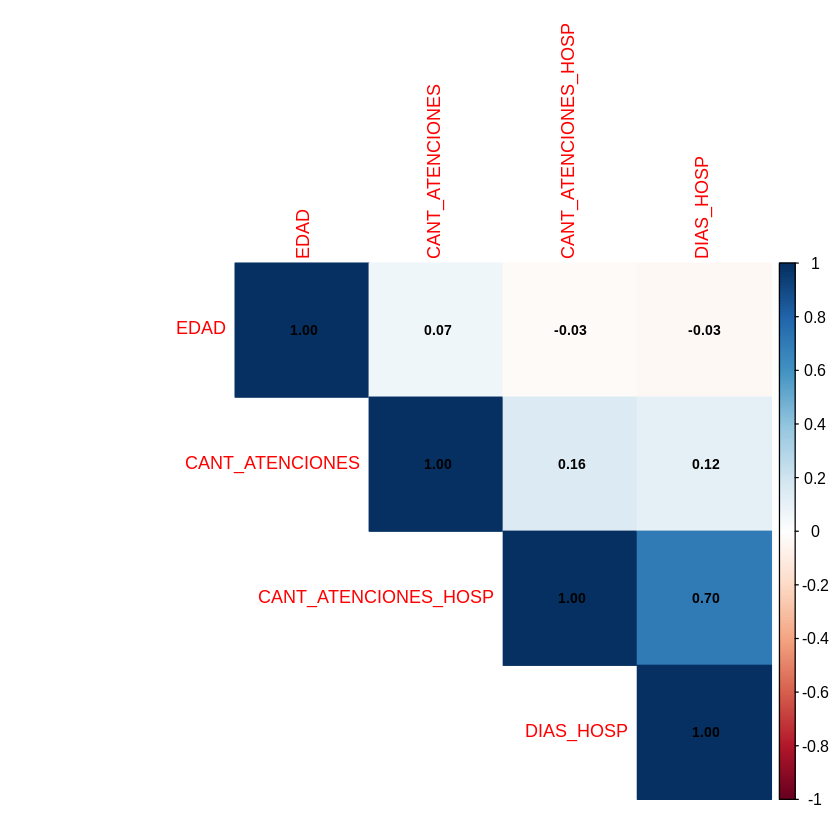

In [22]:
cor_data <- data %>% dplyr::select(where(is.numeric))
cor_matrix <- cor(cor_data)

corrplot(
  cor_matrix,
  method = "color",
  type = "upper",
  tl.cex = 0.9,
  addCoef.col = "black",
  number.cex = 0.7
)


In [23]:
data_bin <- data %>%
  filter(TIPO_DIABETES %in% c("Diabetes mellitus tipo 1",
                              "Diabetes mellitus tipo 2")) %>%
  mutate(
    CLASE = factor(ifelse(TIPO_DIABETES == "Diabetes mellitus tipo 2",
                          "Tipo2", "Tipo1"))
  )



Tipo1 Tipo2 
  574  2230 

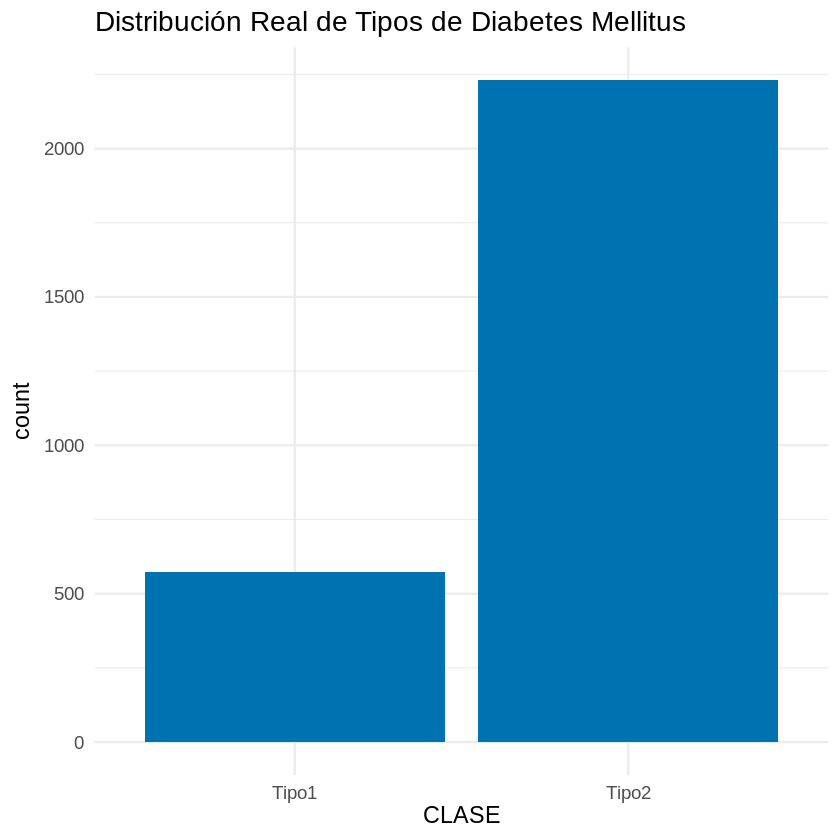

In [24]:
table(data_bin$CLASE)

ggplot(data_bin, aes(x = CLASE)) +
  geom_bar(fill = "#0072B2") +
  theme_minimal(base_size = 14) +
  labs(title = "Distribución Real de Tipos de Diabetes Mellitus")


In [26]:
num_vars <- data_bin %>% dplyr::select(where(is.numeric))

data_scaled <- data_bin
data_scaled[num_vars %>% names()] <- scale(num_vars)


In [27]:
dim(data_scaled)
str(data_scaled)


[1] 2804   10

tibble [2,804 × 10] (S3: tbl_df/tbl/data.frame)
 $ EDAD                : num [1:2804] 0.137 0.834 -1.633 -1.097 0.995 ...
 $ SEXO                : Factor w/ 2 levels "FEMENINO","MASCULINO": 1 2 1 1 1 2 2 1 2 1 ...
 $ CON_DX_OBESIDAD     : Factor w/ 2 levels "NO","SI": 2 2 2 2 2 1 2 1 1 1 ...
 $ CON_DX_HIPERTENSION : Factor w/ 2 levels "NO","SI": 1 1 1 1 2 1 1 1 1 1 ...
 $ CON_DX_SALUDMENTAL  : Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 1 2 ...
 $ CANT_ATENCIONES     : num [1:2804] -0.5719 -0.5719 -0.5719 -0.5719 -0.0828 ...
 $ CANT_ATENCIONES_HOSP: num [1:2804] -0.217 -0.217 -0.217 -0.217 -0.217 ...
 $ DIAS_HOSP           : num [1:2804] -0.18 -0.18 -0.18 -0.18 -0.18 ...
 $ TIPO_DIABETES       : Factor w/ 5 levels "Diabetes mellitus asociada con desnutriciÃ³n",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ CLASE               : Factor w/ 2 levels "Tipo1","Tipo2": 2 2 2 2 2 2 2 2 2 2 ...


In [28]:
# Solo Tipo 1 y Tipo 2
data_model <- data %>%
  filter(TIPO_DIABETES %in% c("Diabetes mellitus tipo 1", "Diabetes mellitus tipo 2")) %>%
  mutate(TIPO_DIABETES = factor(TIPO_DIABETES, levels = c("Diabetes mellitus tipo 1", "Diabetes mellitus tipo 2"),
                                labels = c("Tipo1", "Tipo2")))
table(data_model$TIPO_DIABETES)


Tipo1 Tipo2 
  574  2230 

In [30]:
set.seed(123)

preproc <- preProcess(
  data_model %>% dplyr::select(-TIPO_DIABETES),
  method = c("center", "scale")
)

data_scaled <- predict(preproc, data_model)


In [31]:
set.seed(123)
trainIndex <- createDataPartition(
  data_scaled$TIPO_DIABETES, p = 0.7, list = FALSE
)

train_data <- data_scaled[trainIndex, ]
test_data  <- data_scaled[-trainIndex, ]


In [32]:
ctrl <- trainControl(
  method = "repeatedcv",
  number = 10,
  repeats = 3,
  classProbs = TRUE,
  summaryFunction = twoClassSummary,
  savePredictions = "final"
)


In [33]:
model_glm <- train(
  TIPO_DIABETES ~ ., data = train_data,
  method = "glmnet",
  metric = "ROC",
  trControl = ctrl
)


In [34]:
model_knn <- train(
  TIPO_DIABETES ~ ., data = train_data,
  method = "knn",
  tuneLength = 10,
  metric = "ROC",
  trControl = ctrl
)


In [35]:
model_svm <- train(
  TIPO_DIABETES ~ ., data = train_data,
  method = "svmRadial",
  tuneLength = 10,
  metric = "ROC",
  trControl = ctrl
)


In [36]:
model_dt <- train(
  TIPO_DIABETES ~ ., data = train_data,
  method = "rpart",
  metric = "ROC",
  trControl = ctrl
)


In [37]:
model_nb <- train(
  TIPO_DIABETES ~ ., data = train_data,
  method = "nb",
  metric = "ROC",
  trControl = ctrl
)


Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 67”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 135”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 173”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 183”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 67”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 135”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 173”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 183”
Warn

In [38]:
model_rf <- train(
  TIPO_DIABETES ~ ., data = train_data,
  method = "rf",
  metric = "ROC",
  trControl = ctrl
)


In [39]:
model_nn <- train(
  TIPO_DIABETES ~ ., data = train_data,
  method = "nnet",
  trace = FALSE,
  metric = "ROC",
  trControl = ctrl
)


In [40]:
models <- list(
  GLM = model_glm,
  KNN = model_knn,
  SVM = model_svm,
  DT  = model_dt,
  NB  = model_nb,
  RF  = model_rf,
  NN  = model_nn
)

results <- resamples(models)

summary_df_raw <- summary(results)$statistics$ROC %>%
  as.data.frame() %>%
  rownames_to_column("Modelo")

# Dynamically select the standard deviation column
if ("SD" %in% names(summary_df_raw)) {
  summary_df <- summary_df_raw %>% dplyr::select(Modelo, Mean, SD)
} else if ("StdDev" %in% names(summary_df_raw)) {
  summary_df <- summary_df_raw %>% dplyr::select(Modelo, Mean, StdDev)
} else {
  summary_df <- summary_df_raw %>% dplyr::select(Modelo, Mean) # Fallback if neither SD nor StdDev is found
  warning("Neither 'SD' nor 'StdDev' column found. Displaying only 'Modelo' and 'Mean'.")
}

summary_df

Warning message:
“Neither 'SD' nor 'StdDev' column found. Displaying only 'Modelo' and 'Mean'.”


Modelo,Mean
<chr>,<dbl>
GLM,0.6723819
KNN,0.6485770
SVM,0.5921131
DT,0.6598433
NB,0.6710603
RF,0.5281576
NN,0.6915196


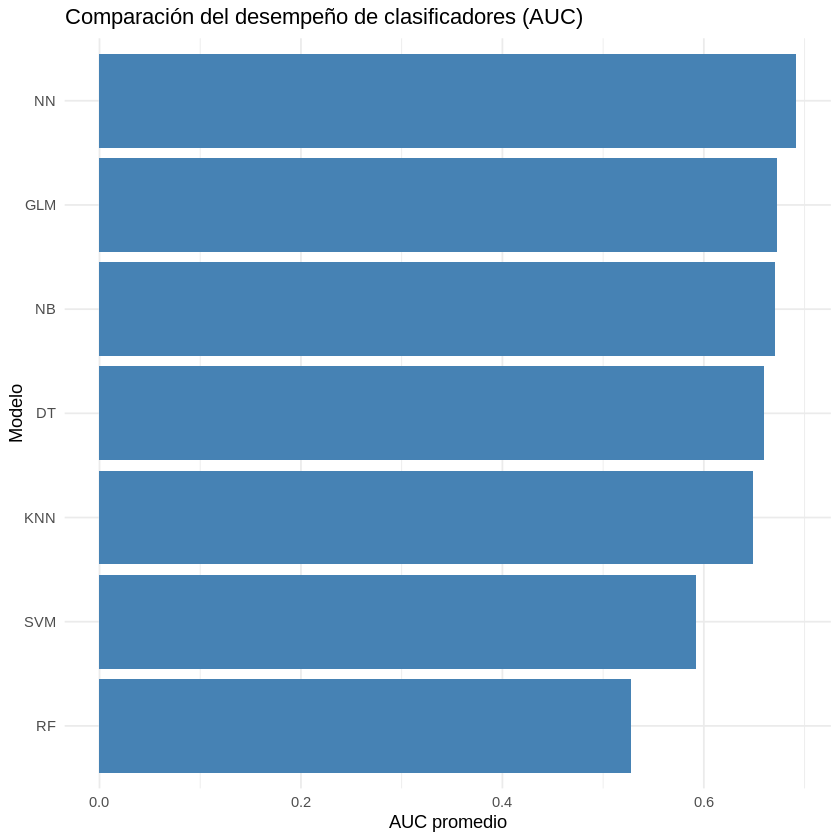

In [41]:
ggplot(summary_df, aes(x = reorder(Modelo, Mean), y = Mean)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Comparación del desempeño de clasificadores (AUC)",
    x = "Modelo",
    y = "AUC promedio"
  ) +
  theme_minimal()


In [68]:

pred_glm <- predict(model_glm, test_data)
conf_glm <- confusionMatrix(pred_glm, test_data$TIPO_DIABETES)
print("MODELO DE REGRESION LOGISTICA")
conf_glm

pred_knn <- predict(model_knn, test_data)
conf_knn <- confusionMatrix(pred_knn, test_data$TIPO_DIABETES)
print("MODELO DE KNN")
conf_knn

pred_svm <- predict(model_svm, test_data)
conf_svm <- confusionMatrix(pred_svm, test_data$TIPO_DIABETES)
print("MODELO DE SVM")
conf_svm

pred_dt <- predict(model_dt, test_data)
conf_dt <- confusionMatrix(pred_dt, test_data$TIPO_DIABETES)
print("MODELO DE DT")
conf_dt

pred_nb <- predict(model_nb, test_data)
conf_nb <- confusionMatrix(pred_nb, test_data$TIPO_DIABETES)
print("MODELO NB")
conf_nb

pred_rf <- predict(model_rf, test_data)
conf_rf <- confusionMatrix(pred_rf, test_data$TIPO_DIABETES)
print("MODELO RF")
conf_rf

pred_nn <- predict(model_nn, test_data)
conf_nn <- confusionMatrix(pred_nn, test_data$TIPO_DIABETES)
print("MODELO NN")
conf_nn




[1] "MODELO DE REGRESION LOGISTICA"


Confusion Matrix and Statistics

          Reference
Prediction Tipo1 Tipo2
     Tipo1     0     0
     Tipo2   172   669
                                          
               Accuracy : 0.7955          
                 95% CI : (0.7666, 0.8223)
    No Information Rate : 0.7955          
    P-Value [Acc > NIR] : 0.5204          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.7955          
             Prevalence : 0.2045          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Tipo1           
                  

[1] "MODELO DE KNN"


Confusion Matrix and Statistics

          Reference
Prediction Tipo1 Tipo2
     Tipo1     5     5
     Tipo2   167   664
                                          
               Accuracy : 0.7955          
                 95% CI : (0.7666, 0.8223)
    No Information Rate : 0.7955          
    P-Value [Acc > NIR] : 0.5204          
                                          
                  Kappa : 0.0332          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.029070        
            Specificity : 0.992526        
         Pos Pred Value : 0.500000        
         Neg Pred Value : 0.799037        
             Prevalence : 0.204518        
         Detection Rate : 0.005945        
   Detection Prevalence : 0.011891        
      Balanced Accuracy : 0.510798        
                                          
       'Positive' Class : Tipo1           
                  

[1] "MODELO DE SVM"


Confusion Matrix and Statistics

          Reference
Prediction Tipo1 Tipo2
     Tipo1     0     0
     Tipo2   172   669
                                          
               Accuracy : 0.7955          
                 95% CI : (0.7666, 0.8223)
    No Information Rate : 0.7955          
    P-Value [Acc > NIR] : 0.5204          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.7955          
             Prevalence : 0.2045          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Tipo1           
                  

[1] "MODELO DE DT"


Confusion Matrix and Statistics

          Reference
Prediction Tipo1 Tipo2
     Tipo1    16    48
     Tipo2   156   621
                                         
               Accuracy : 0.7574         
                 95% CI : (0.727, 0.7861)
    No Information Rate : 0.7955         
    P-Value [Acc > NIR] : 0.9968         
                                         
                  Kappa : 0.0277         
                                         
 Mcnemar's Test P-Value : 6.809e-14      
                                         
            Sensitivity : 0.09302        
            Specificity : 0.92825        
         Pos Pred Value : 0.25000        
         Neg Pred Value : 0.79923        
             Prevalence : 0.20452        
         Detection Rate : 0.01902        
   Detection Prevalence : 0.07610        
      Balanced Accuracy : 0.51064        
                                         
       'Positive' Class : Tipo1          
                                      

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 767”


[1] "MODELO NB"


Confusion Matrix and Statistics

          Reference
Prediction Tipo1 Tipo2
     Tipo1     0     1
     Tipo2   172   668
                                          
               Accuracy : 0.7943          
                 95% CI : (0.7654, 0.8211)
    No Information Rate : 0.7955          
    P-Value [Acc > NIR] : 0.5543          
                                          
                  Kappa : -0.0024         
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.000000        
            Specificity : 0.998505        
         Pos Pred Value : 0.000000        
         Neg Pred Value : 0.795238        
             Prevalence : 0.204518        
         Detection Rate : 0.000000        
   Detection Prevalence : 0.001189        
      Balanced Accuracy : 0.499253        
                                          
       'Positive' Class : Tipo1           
                  

[1] "MODELO RF"


Confusion Matrix and Statistics

          Reference
Prediction Tipo1 Tipo2
     Tipo1     0     0
     Tipo2   172   669
                                          
               Accuracy : 0.7955          
                 95% CI : (0.7666, 0.8223)
    No Information Rate : 0.7955          
    P-Value [Acc > NIR] : 0.5204          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.7955          
             Prevalence : 0.2045          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Tipo1           
                  

[1] "MODELO NN"


Confusion Matrix and Statistics

          Reference
Prediction Tipo1 Tipo2
     Tipo1     3     6
     Tipo2   169   663
                                          
               Accuracy : 0.7919          
                 95% CI : (0.7629, 0.8189)
    No Information Rate : 0.7955          
    P-Value [Acc > NIR] : 0.6205          
                                          
                  Kappa : 0.0131          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.017442        
            Specificity : 0.991031        
         Pos Pred Value : 0.333333        
         Neg Pred Value : 0.796875        
             Prevalence : 0.204518        
         Detection Rate : 0.003567        
   Detection Prevalence : 0.010702        
      Balanced Accuracy : 0.504237        
                                          
       'Positive' Class : Tipo1           
                  

In [46]:
pca <- prcomp(train_data %>% dplyr::select(where(is.numeric)), scale. = TRUE)

train_pca <- data.frame(pca$x[,1:2], Class = train_data$TIPO_DIABETES)

In [72]:
glm_metrics <- data.frame(
  Accuracy  = conf_glm$overall["Accuracy"],
  Sensitivity = conf_glm$byClass["Sensitivity"],
  Specificity = conf_glm$byClass["Specificity"],
  Precision = conf_glm$byClass["Precision"],
  F1 = conf_glm$byClass["F1"]
)
knn_metrics <- data.frame(
  Accuracy  = conf_knn$overall["Accuracy"],
  Sensitivity = conf_knn$byClass["Sensitivity"],
  Specificity = conf_knn$byClass["Specificity"],
  Precision = conf_knn$byClass["Precision"],
  F1 = conf_knn$byClass["F1"]
)
svm_metrics <- data.frame(
  Accuracy  = conf_svm$overall["Accuracy"],
  Sensitivity = conf_svm$byClass["Sensitivity"],
  Specificity = conf_svm$byClass["Specificity"],
  Precision = conf_svm$byClass["Precision"],
  F1 = conf_svm$byClass["F1"]
)
dt_metrics <- data.frame(
  Accuracy  = conf_dt$overall["Accuracy"],
  Sensitivity = conf_dt$byClass["Sensitivity"],
  Specificity = conf_dt$byClass["Specificity"],
  Precision = conf_dt$byClass["Precision"],
  F1 = conf_dt$byClass["F1"]
)
nb_metrics <- data.frame(
  Accuracy  = conf_nb$overall["Accuracy"],
  Sensitivity = conf_nb$byClass["Sensitivity"],
  Specificity = conf_nb$byClass["Specificity"],
  Precision = conf_nb$byClass["Precision"],
  F1 = conf_nb$byClass["F1"]
)
rf_metrics <- data.frame(
  Accuracy  = conf_rf$overall["Accuracy"],
  Sensitivity = conf_rf$byClass["Sensitivity"],
  Specificity = conf_rf$byClass["Specificity"],
  Precision = conf_rf$byClass["Precision"],
  F1 = conf_rf$byClass["F1"]
)
nn_metrics <- data.frame(
  Accuracy  = conf_nn$overall["Accuracy"],
  Sensitivity = conf_nn$byClass["Sensitivity"],
  Specificity = conf_nn$byClass["Specificity"],
  Precision = conf_nn$byClass["Precision"],
  F1 = conf_nn$byClass["F1"]
)
print("Metricas de GML")
glm_metrics
print("Metricas de knn")
knn_metrics
print("Metricas de svm")
svm_metrics
print("Metricas de dt")
dt_metrics
print("Metricas de nb")
nb_metrics
print("Metricas de rf")
rf_metrics
print("Metricas de nn")
nn_metrics


[1] "Metricas de GML"


,Accuracy,Sensitivity,Specificity,Precision,F1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7954816,0,1,NA,NA


[1] "Metricas de knn"


,Accuracy,Sensitivity,Specificity,Precision,F1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7954816,0.02906977,0.9925262,0.5,0.05494505


[1] "Metricas de svm"


,Accuracy,Sensitivity,Specificity,Precision,F1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7954816,0,1,NA,NA


[1] "Metricas de dt"


,Accuracy,Sensitivity,Specificity,Precision,F1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7574316,0.09302326,0.9282511,0.25,0.1355932


[1] "Metricas de nb"


,Accuracy,Sensitivity,Specificity,Precision,F1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7942925,0,0.9985052,0,NaN


[1] "Metricas de rf"


,Accuracy,Sensitivity,Specificity,Precision,F1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7954816,0,1,NA,NA


[1] "Metricas de nn"


,Accuracy,Sensitivity,Specificity,Precision,F1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7919144,0.01744186,0.9910314,0.3333333,0.03314917


In [84]:
models <- list(
  "Logistic Regression" = list(model = model_glm, pred = pred_glm, conf = conf_glm),
  "KNN"                 = list(model = model_knn, pred = pred_knn, conf = conf_knn),
  "SVM"                 = list(model = model_svm, pred = pred_svm, conf = conf_svm),
  "Decision Tree"       = list(model = model_dt,  pred = pred_dt,  conf = conf_dt),
  "Naive Bayes"         = list(model = model_nb,  pred = pred_nb,  conf = conf_nb),
  "Random Forest"       = list(model = model_rf,  pred = pred_rf,  conf = conf_rf),
  "Neural Network"      = list(model = model_nn,  pred = pred_nn,  conf = conf_nn)
)


In [85]:
plot_confusion <- function(conf, title){

  df <- as.data.frame(conf$table)

  ggplot(df, aes(Prediction, Reference, fill = Freq)) +
    geom_tile(color = "white") +
    geom_text(aes(label = Freq), size = 5, fontface = "bold") +
    scale_fill_gradient(low = "#D6EAF8", high = "#154360") +
    theme_minimal() +
    labs(
      title = title,
      x = "Predicted label",
      y = "True label"
    ) +
    theme(
      plot.margin = unit(c(15, 15, 15, 15), "pt"), # Explicitly define units
      axis.text = element_text(size = 11),
      axis.title = element_text(size = 12),
      plot.title = element_text(face = "bold", size = 13, hjust = 0.5)
    )
}

plot_pred_vs_actual <- function(pred, actual, title){

  df <- data.frame(
    Index = seq_along(actual),
    Actual = as.numeric(actual),
    Predicted = as.numeric(pred)
  )

  ggplot(df, aes(Index)) +
    geom_point(aes(y = Actual, color = "Actual"),
               size = 2.3, alpha = 0.6) +
    geom_point(aes(y = Predicted, color = "Predicted"),
               size = 2.3, alpha = 0.6) +
    scale_color_manual(values = c(
      "Actual" = "black",
      "Predicted" = "#E67E22"
    )) +
    theme_minimal() +
    labs(
      title = title,
      y = "Class",
      x = "Sample index"
    ) +
    theme(
      plot.margin = unit(c(15, 20, 15, 20), "pt"), # Explicitly define units
      axis.text = element_text(size = 11),
      axis.title = element_text(size = 12),
      plot.title = element_text(face = "bold", size = 13, hjust = 0.5),
      legend.position = "top"
    )
}

In [86]:
plot_model_results <- function(model_name, conf, pred, actual){

  p_conf <- plot_confusion(
    conf,
    paste(model_name, "– Confusion Matrix")
  )

  p_scatter <- plot_pred_vs_actual(
    pred,
    actual,
    paste(model_name, "– Predicted vs Actual")
  )

  ggarrange(
    p_conf,
    p_scatter,
    ncol = 2,
    widths = c(1, 1.3),
    align = "h"
  )
}


In [87]:
plots_models <- lapply(names(models), function(name){

  plot_model_results(
    model_name = name,
    conf  = models[[name]]$conf,
    pred  = models[[name]]$pred,
    actual = test_data$TIPO_DIABETES
  )
})


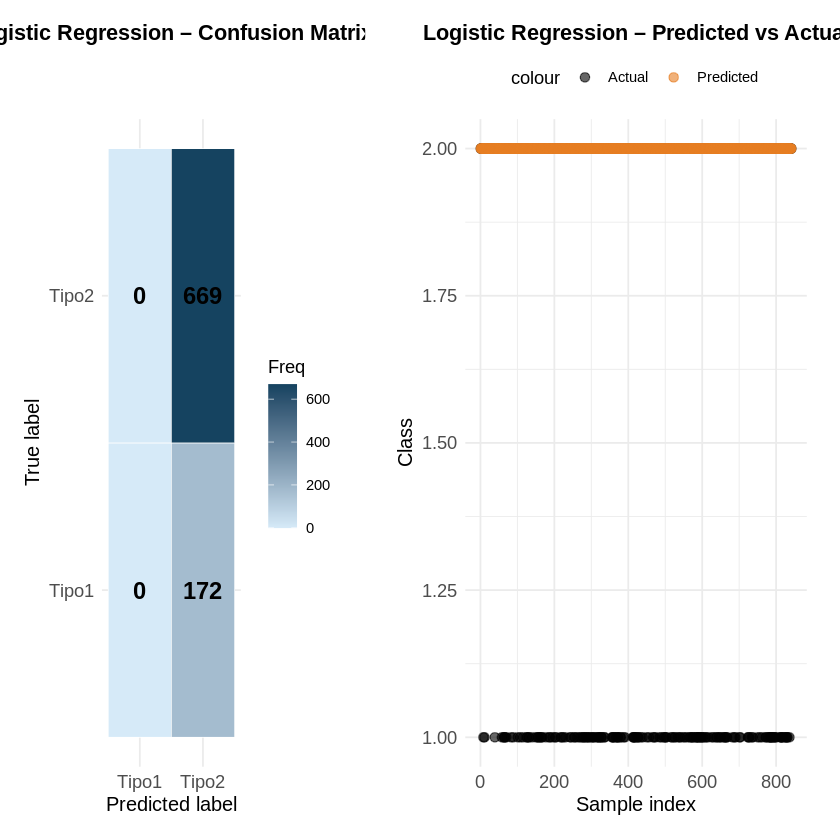

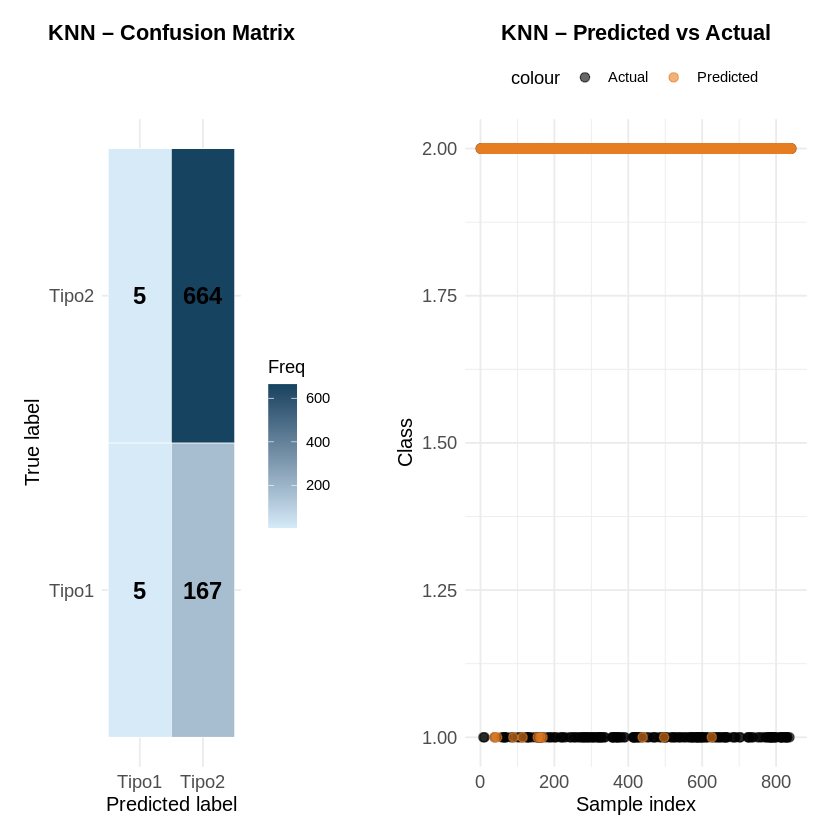

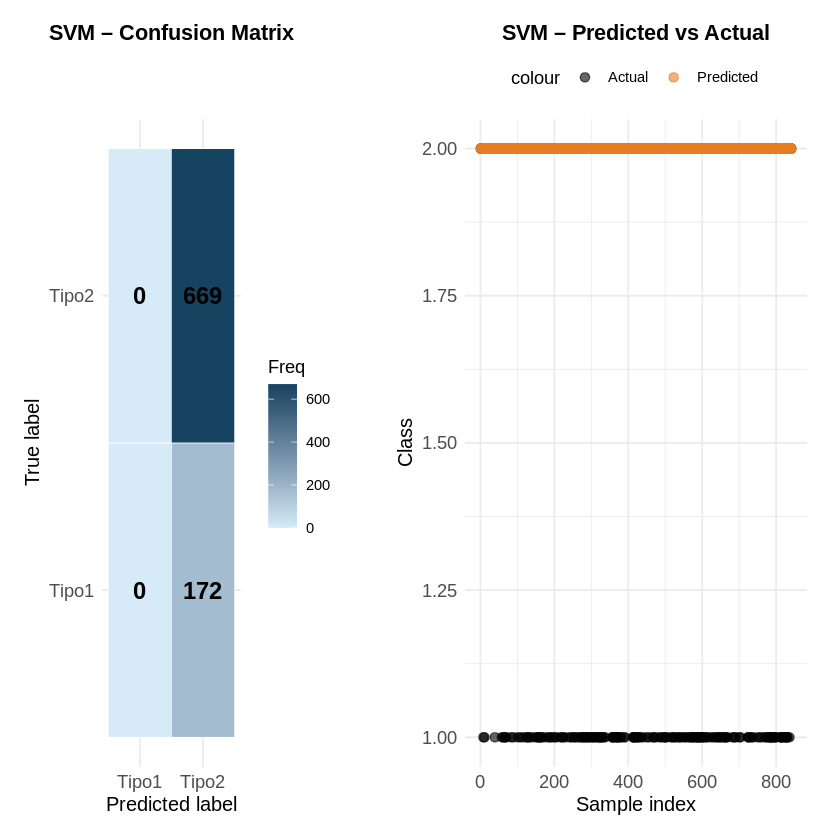

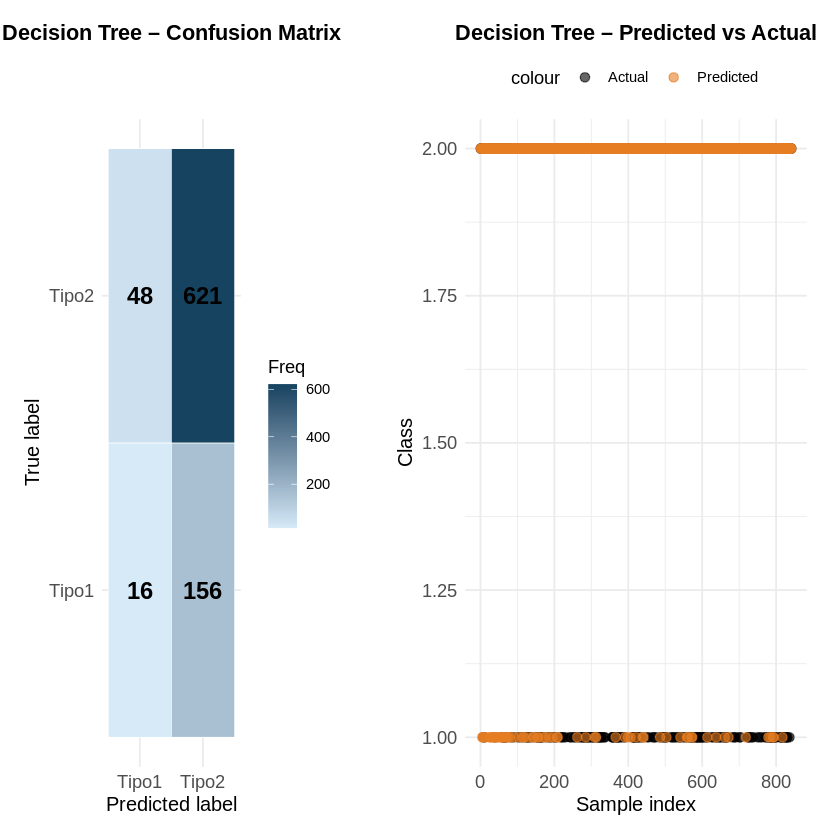

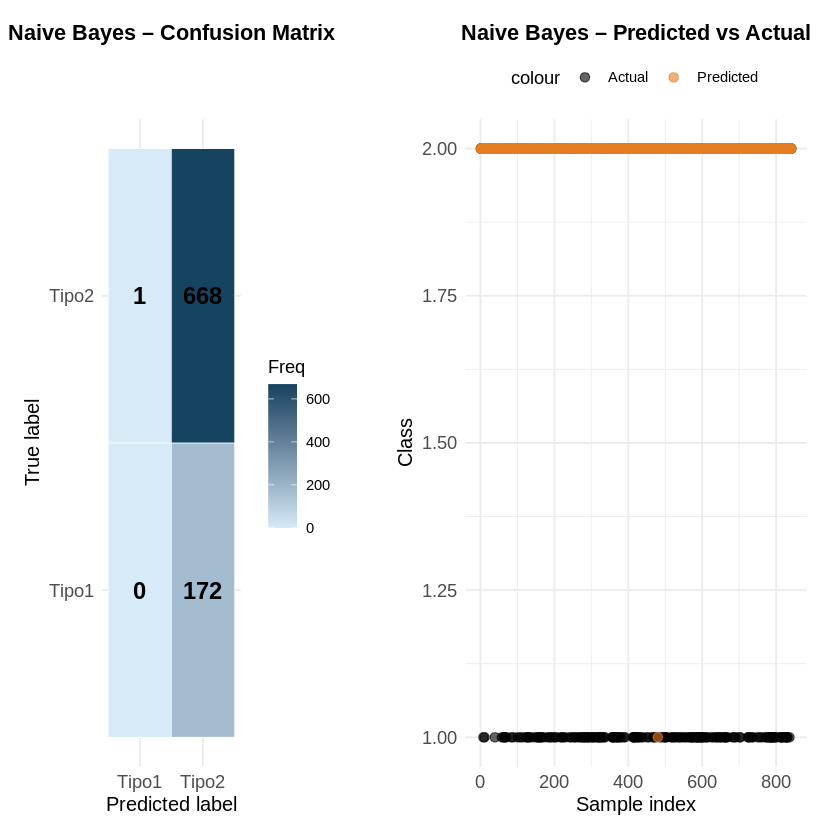

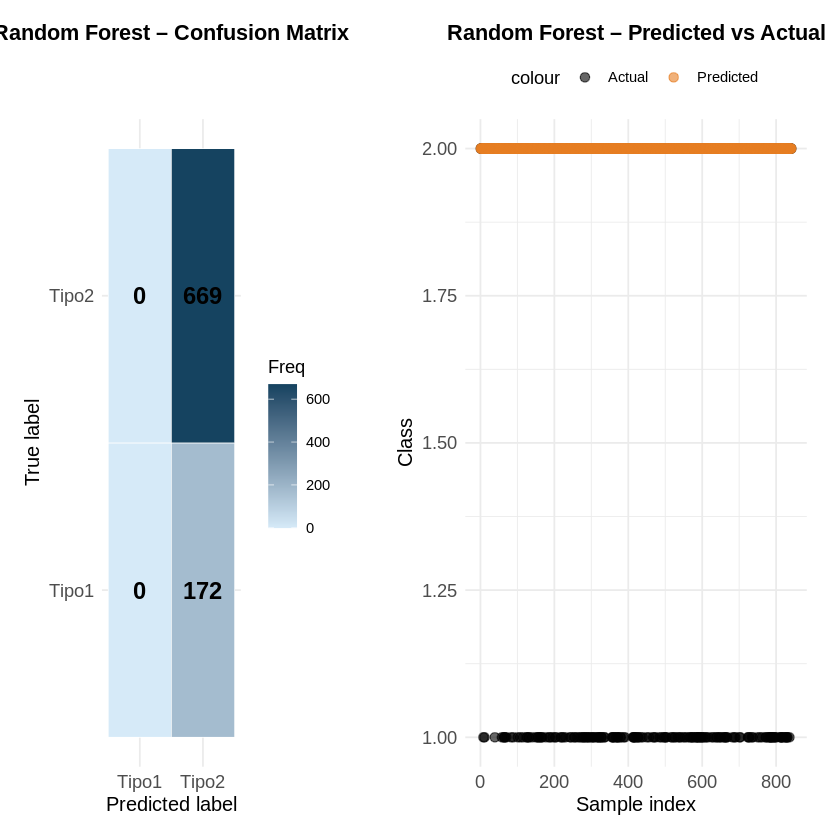

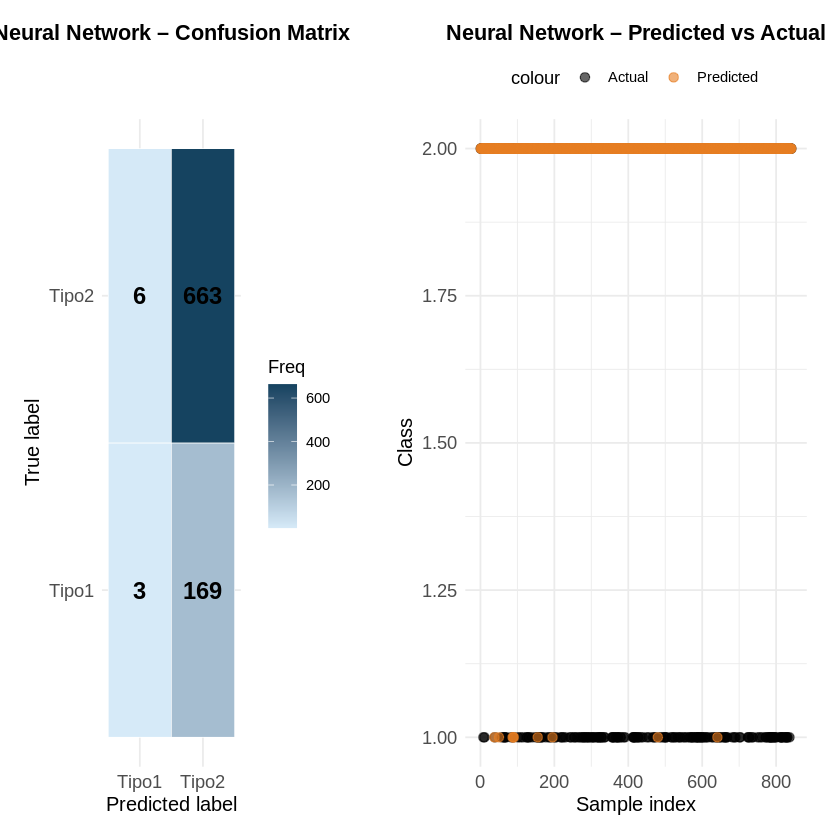

In [88]:
plots_models[[1]]  # Regresión logística
plots_models[[2]]  # KNN
plots_models[[3]]  # SVM
plots_models[[4]]  # Decision Tree
plots_models[[5]]  # Naive Bayes
plots_models[[6]]  # Random Forest
plots_models[[7]]  # Neural Network


In [65]:
roc_models <- list(
  Logistic = model_glm,
  KNN = model_knn,
  SVM = model_svm,
  DT  = model_dt,
  NB  = model_nb,
  RF  = model_rf,
  NN  = model_nn
)

roc_list <- lapply(roc_models, function(m){
  roc(
    test_data$TIPO_DIABETES,
    predict(m, test_data, type = "prob")[,2]
  )
})


Setting levels: control = Tipo1, case = Tipo2

Setting direction: controls < cases

Setting levels: control = Tipo1, case = Tipo2

Setting direction: controls < cases

Setting levels: control = Tipo1, case = Tipo2

Setting direction: controls < cases

Setting levels: control = Tipo1, case = Tipo2

Setting direction: controls < cases

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 767”
Setting levels: control = Tipo1, case = Tipo2

Setting direction: controls < cases

Setting levels: control = Tipo1, case = Tipo2

Setting direction: controls > cases

Setting levels: control = Tipo1, case = Tipo2

Setting direction: controls < cases



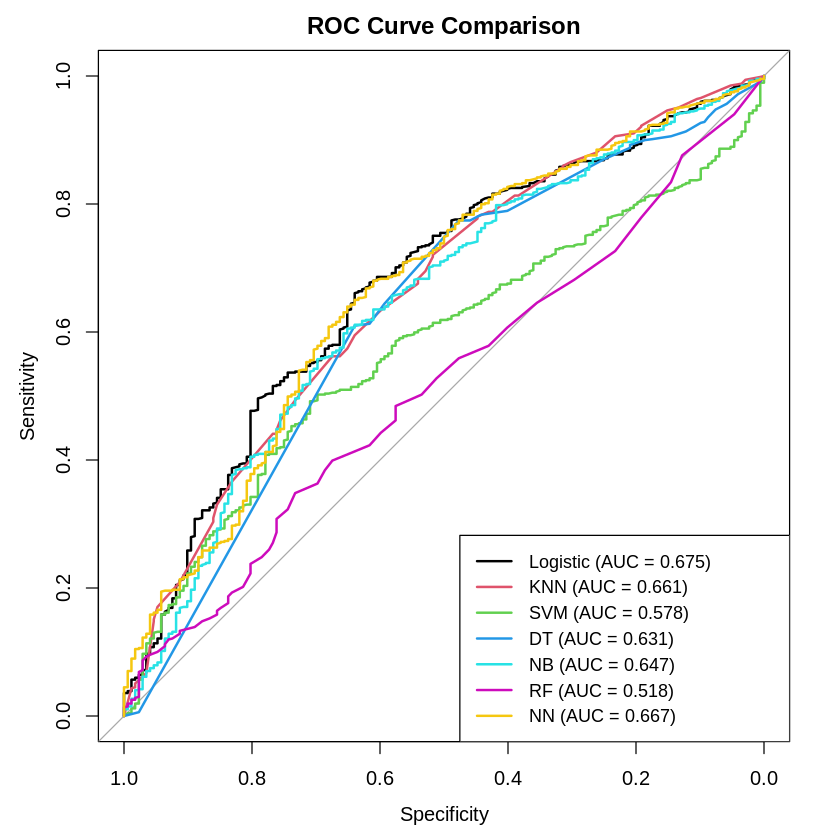

In [66]:
plot(roc_list[[1]], col = 1, lwd = 2,
     main = "ROC Curve Comparison")

i <- 2
for (r in roc_list[-1]) {
  plot(r, col = i, lwd = 2, add = TRUE)
  i <- i + 1
}

legend_labels <- sapply(names(roc_list), function(n){
  auc_val <- auc(roc_list[[n]])
  paste0(n, " (AUC = ", round(auc_val, 3), ")")
})

legend(
  "bottomright",
  legend = legend_labels,
  col = 1:length(roc_list),
  lwd = 2,
  cex = 0.9
)
